In [1]:
import datetime
import csv
import matplotlib.pyplot as plt

FILENAME = './datasets/GTL_filtered.csv'

### 1. Load the Global Land Temperature dataset as a list of lists

In [2]:
with open(FILENAME) as f:
    temperatures = []
    last_avg_temperature = 0
    
    for row in csv.reader(f):
        try:
            cols = row
            
            try:
                tmp_date = datetime.strptime(cols[0], "%Y-%m-%d")
            except:
                tmp_date = False
                
            try:
                tmp_avg_tmp = float(cols[1])
            except:
                tmp_avg_tmp = False
                
            try:
                tmp_avg_uncert_tmp = float(cols[2])
            except:
                tmp_avg_uncert_tmp = False
                
            tmp_city = cols[3]
            tmp_lat = cols[4]
            tmp_lon = cols[5]
            
            temperatures.append({
                'date': tmp_date,
                'avg_tmp': tmp_avg_tmp,
                'avg_uncert_tmp': tmp_avg_uncert_tmp,
                'city': tmp_city,
                'lat': tmp_lat,
                'lon': tmp_lon,
            })
        except:
            print('An error occured.' + row[1])

### 2. Analyze AverageTemperature and fill any gap

In [3]:
last_avg_tmp = 0
last_city = False
for i in range(0, len(temperatures)):
    tmp = temperatures[i]
    
    if(last_city != tmp['city']):
        last_city = tmp['city']
        last_avg_tmp = 0
    
    if(tmp['avg_tmp'] == False):
        next_avg_tmp = 0
        for j in range(i+1, len(temperatures)):
            next_tmp = temperatures[j]
            if(tmp['city'] == next_tmp['city']):
                if(next_tmp['avg_tmp'] != False):
                    next_avg_tmp = next_tmp['avg_tmp']
                    break
            else:
                break
        
        tmp['avg_tmp'] = (last_avg_temperature + next_avg_tmp) / 2 
    
    last_avg_temperature = tmp['avg_tmp']

### 3. Top N hottest and coldest measurements

In [4]:
city = 'Abidjan'
N = 10

def filterByCity(element):
    if(element['city'] == city):
        return True
    else:
        return False
def getSortingKey(element):
    return element['avg_tmp']

city_temperatures = filter(filterByCity, temperatures)
    
asc_sorted_temperatures = sorted(city_temperatures, key=getSortingKey)

#### 3.a Top N hottest

In [5]:
hottest_measurements = asc_sorted_temperatures[-N:]

print(">> Top " + str(N) + " hottest measurements in " + city)
for measurement in hottest_measurements:
    print(str(measurement['date']) + " - " + str(measurement['avg_tmp']))

>> Top 10 hottest measurements in Abidjan
False - 29.246
False - 29.262
False - 29.278
False - 29.288
False - 29.345
False - 29.405
False - 29.471
False - 29.477
False - 29.596
False - 29.923


#### 3.b Top N coldest

In [6]:
coldest_measurements = asc_sorted_temperatures[:N]

print(">> Top " + str(N) + " coldest measurements in " + city)
for measurement in coldest_measurements:
    print(str(measurement['date']) + " - " + str(measurement['avg_tmp']))

>> Top 10 coldest measurements in Abidjan
False - 22.363000000000003
False - 22.377
False - 22.528
False - 22.63000000000001
False - 22.644
False - 22.682
False - 22.728
False - 22.75
False - 22.819000000000006
False - 22.912


### 4. Anomalies

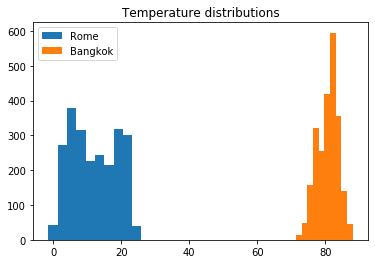

In [7]:
def plottableListOfTemeratures(city, temperatures):
    city_temperatures = filter(lambda x: x['city'] == city, temperatures)
    temperatures_map = map(lambda x: x['avg_tmp'], city_temperatures)
    temperatures_list = list(temperatures_map)
    
    return temperatures_list

plt.title('Temperature distributions')
plt.hist(plottableListOfTemeratures('Rome', temperatures))
plt.hist(plottableListOfTemeratures('Bangkok', temperatures))
plt.legend(['Rome', 'Bangkok'])
plt.show()

Maybe the problem is that we have Celsius for Rome and Fahrenheit for Bangkok?

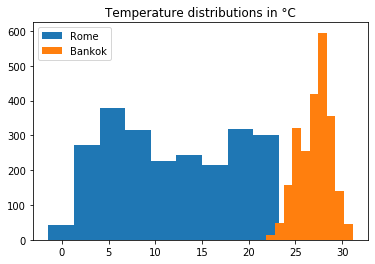

In [8]:
def convertListTemperaturesToFahrenheit(temp_list):
    new_list = temp_list.copy()
    for elem in new_list:
        elem['avg_tmp'] = 1.8 * elem['avg_tmp'] + 32
    return new_list

rome_temp = plottableListOfTemeratures('Rome', temperatures)
bangkok_temp_fahrenheit = plottableListOfTemeratures('Bangkok', temperatures)
bangkok_temp_celsius = list(map(lambda x: (x - 32) / 1.8, bangkok_temp_fahrenheit))

plt.hist(rome_temp)
plt.hist(bangkok_temp_celsius)
plt.legend(['Rome', 'Bankok'])
plt.title('Temperature distributions in °C')
plt.show()